In [1]:
import numpy as np
import pandas as pd
from myutils import plot_utils as pu


## Load metrics

In [2]:
metrics_dic = {}

# Using all available data
metrics_dic["FINK"] = pd.read_csv('../dump/data_fink/metrics.csv')
metrics_dic["ZTF"] = pd.read_csv('../dump/data_ZTF/metrics.csv')
metrics_dic["TNS"] = pd.read_csv('../dump/data_allTNS/metrics.csv')

# Using only those with probability 0.4<p<0.6
metrics_dic["FINK_probacut"] = pd.read_csv('../dump/data_fink_proba/metrics.csv')
metrics_dic["ZTF_probacut"] = pd.read_csv('../dump/data_ZTF_proba/metrics.csv')
metrics_dic["TNS_probacut"] = pd.read_csv('../dump/data_allTNS_proba/metrics.csv')

In [3]:
# date reformatting to align with all dates in our metrics
all_dates = np.concat([metrics_dic[k]['date'].astype(int).values for k in metrics_dic.keys()])
all_dates = np.unique(all_dates)

# reformatting
# lets put the date_plot in the same baseline using the combining dataset
to_merge = pd.DataFrame({'date':all_dates, 'date_plot_universal':np.arange(0,len(all_dates))})

for k in metrics_dic.keys():
    metrics_dic[k]['date'] = metrics_dic[k]['date'].astype(int)
    metrics_dic[k] = pd.merge(metrics_dic[k], to_merge, on='date',how='left')

In [4]:
metrics_dic[k].keys()

Index(['date', 'loop', 'accuracy', 'efficiency', 'purity', 'fom',
       'query_objectIds', 'date_plot', 'n spectra', 'date_plot_universal'],
      dtype='object')

In [5]:
for k in metrics_dic.keys():
    print(metrics_dic[k][metrics_dic[k].loop==30])

       date  loop  accuracy  efficiency    purity       fom   query_objectIds  \
0  20230924    30  0.447863    0.218652  0.869674  0.150839  ['ZTF23abecphw']   

   date_plot  n spectra  date_plot_universal  
0          0          1                    0  
       date  loop  accuracy  efficiency   purity       fom  \
0  20230924    30  0.469231    0.248897  0.88764  0.180393   

                    query_objectIds  date_plot  n spectra  date_plot_universal  
0  ['ZTF23abdynfn', 'ZTF23aberpzw']          0          2                    0  
       date  loop  accuracy  efficiency    purity      fom  \
0  20230924    30  0.501709    0.300567  0.894934  0.22228   

                                     query_objectIds  date_plot  n spectra  \
0  ['ZTF23abdynfn', 'ZTF23abeoblh', 'ZTF23aberpzw...          0          4   

   date_plot_universal  
0                    0  
       date  loop  accuracy  efficiency    purity       fom   query_objectIds  \
0  20230924    30  0.447863    0.218652  0.

In [6]:
for k in metrics_dic.keys():
    print(k,metrics_dic[k].max()[['loop','accuracy','efficiency', 'purity', 'fom']])

FINK loop                88
accuracy      0.640598
efficiency    0.551985
purity        0.876404
fom           0.383306
dtype: object
ZTF loop               123
accuracy      0.611111
efficiency    0.496534
purity         0.88764
fom           0.350881
dtype: object
TNS loop               166
accuracy      0.658547
efficiency    0.591682
purity        0.894934
fom           0.405268
dtype: object
FINK_probacut loop                87
accuracy      0.505556
efficiency    0.345306
purity        0.871537
fom           0.209787
dtype: object
ZTF_probacut loop               123
accuracy      0.554274
efficiency    0.455577
purity        0.866405
fom           0.261414
dtype: object
TNS_probacut loop               164
accuracy      0.611538
efficiency     0.52678
purity        0.866405
fom           0.336174
dtype: object


## Plots

plot_obs_seasons True
20230925
found 20230925
20240225
found 20240224
20240404
found 20240404
20240624
found 20240622


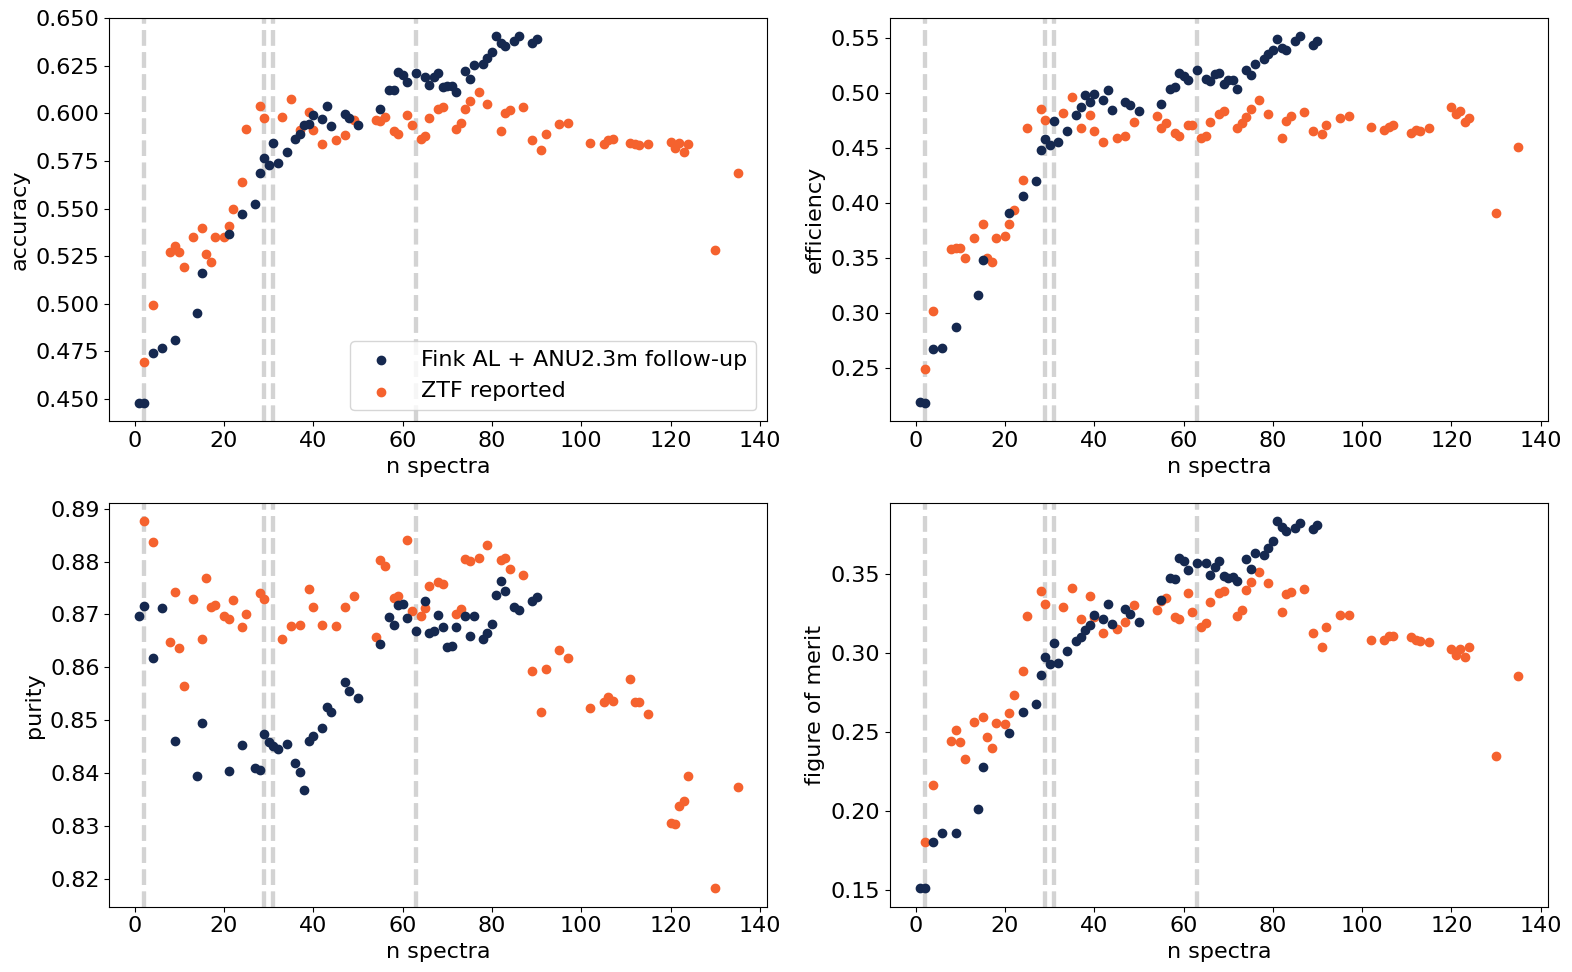

In [7]:
pu.plot_metrics_listdf([metrics_dic['FINK'],metrics_dic['ZTF']],['Fink AL + ANU2.3m follow-up','ZTF reported'],varx='n spectra', plots_dir = '../plots/', suffix='_FINK_ZTF',plot_obs_seasons=True)

plot_obs_seasons True
20230925
found 20230925
20240225
found 20240224
20240404
found 20240404
20240624
found 20240622


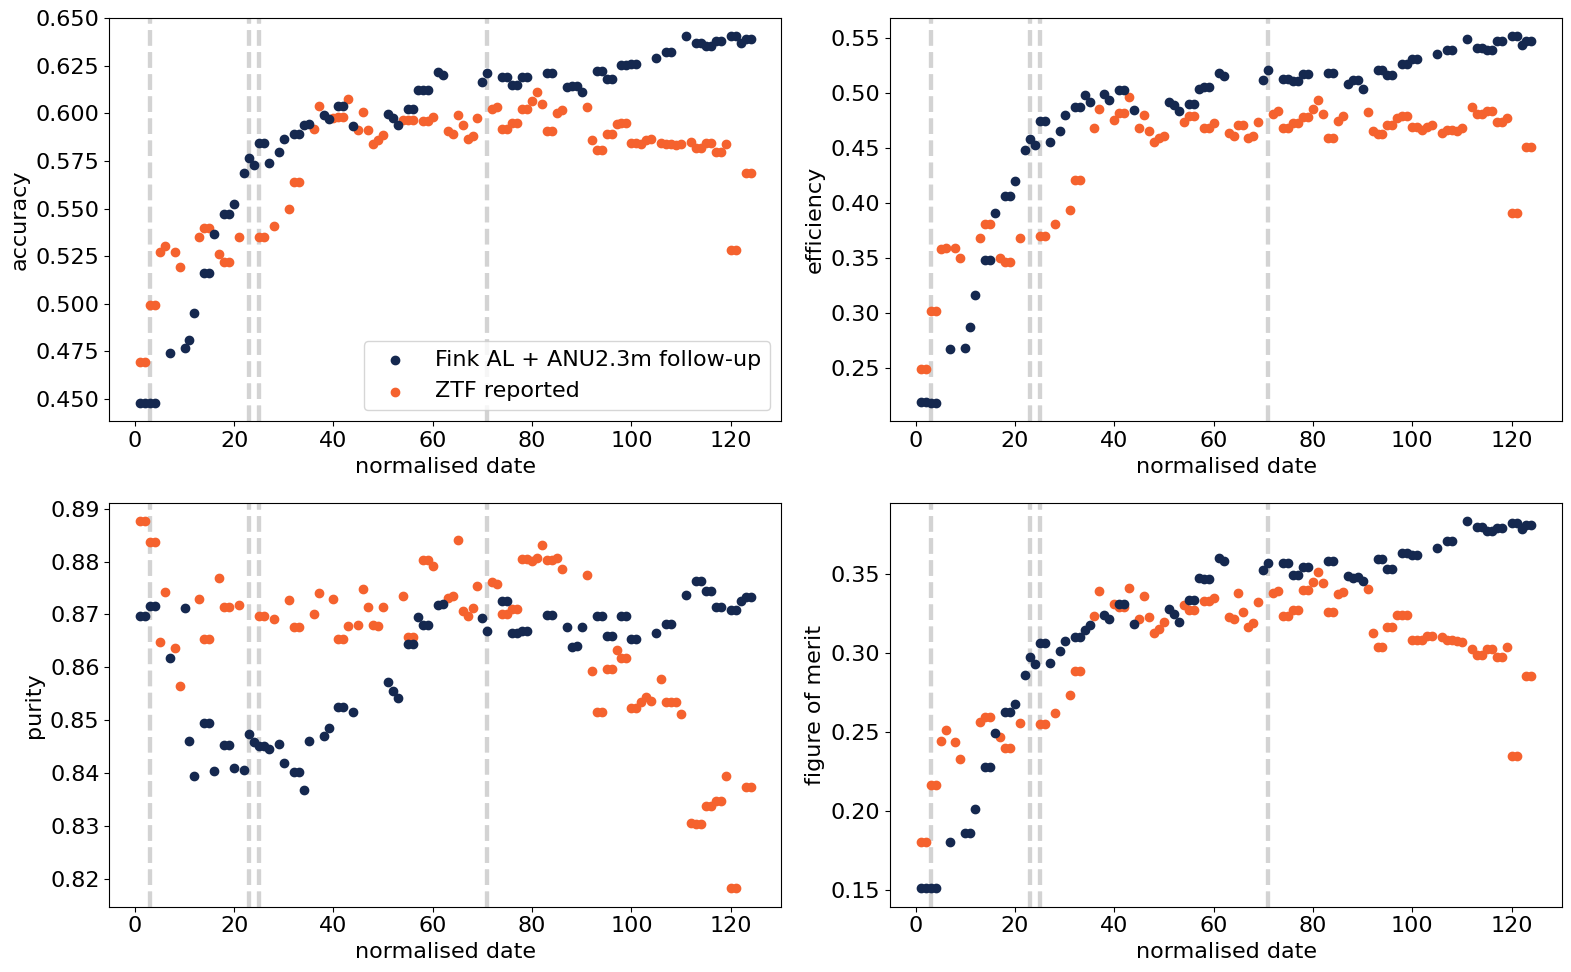

In [8]:
pu.plot_metrics_listdf([metrics_dic['FINK'],metrics_dic['ZTF']],['Fink AL + ANU2.3m follow-up','ZTF reported'], plots_dir = '../plots/', suffix='_FINK_ZTF',plot_obs_seasons=True)


plot_obs_seasons True
20230925
found 20230925
20240225
found 20240224
20240404
found 20240404
20240624
found 20240622


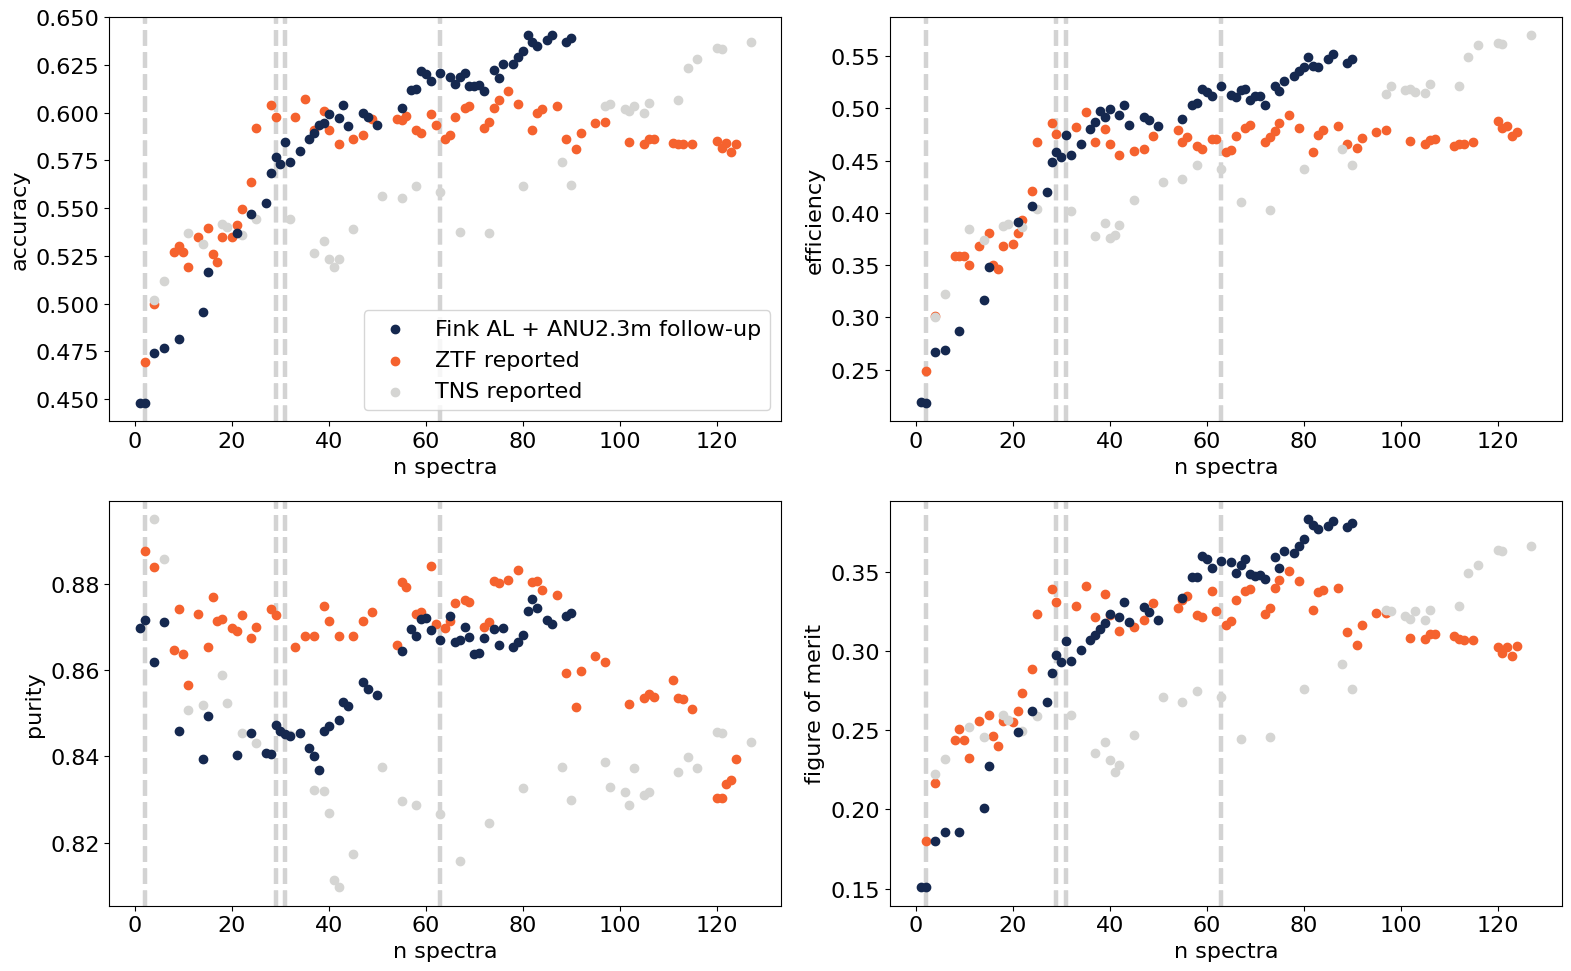

In [11]:
pu.plot_metrics_listdf([metrics_dic['FINK'],metrics_dic['ZTF'][metrics_dic['ZTF']['n spectra']<130],metrics_dic['TNS'][metrics_dic['TNS']['n spectra']<130]],['Fink AL + ANU2.3m follow-up','ZTF reported', 'TNS reported'],varx='n spectra', plots_dir = '../plots/', suffix='_FINK_ZTF_TNS_zoom',plot_obs_seasons=True)


plot_obs_seasons False


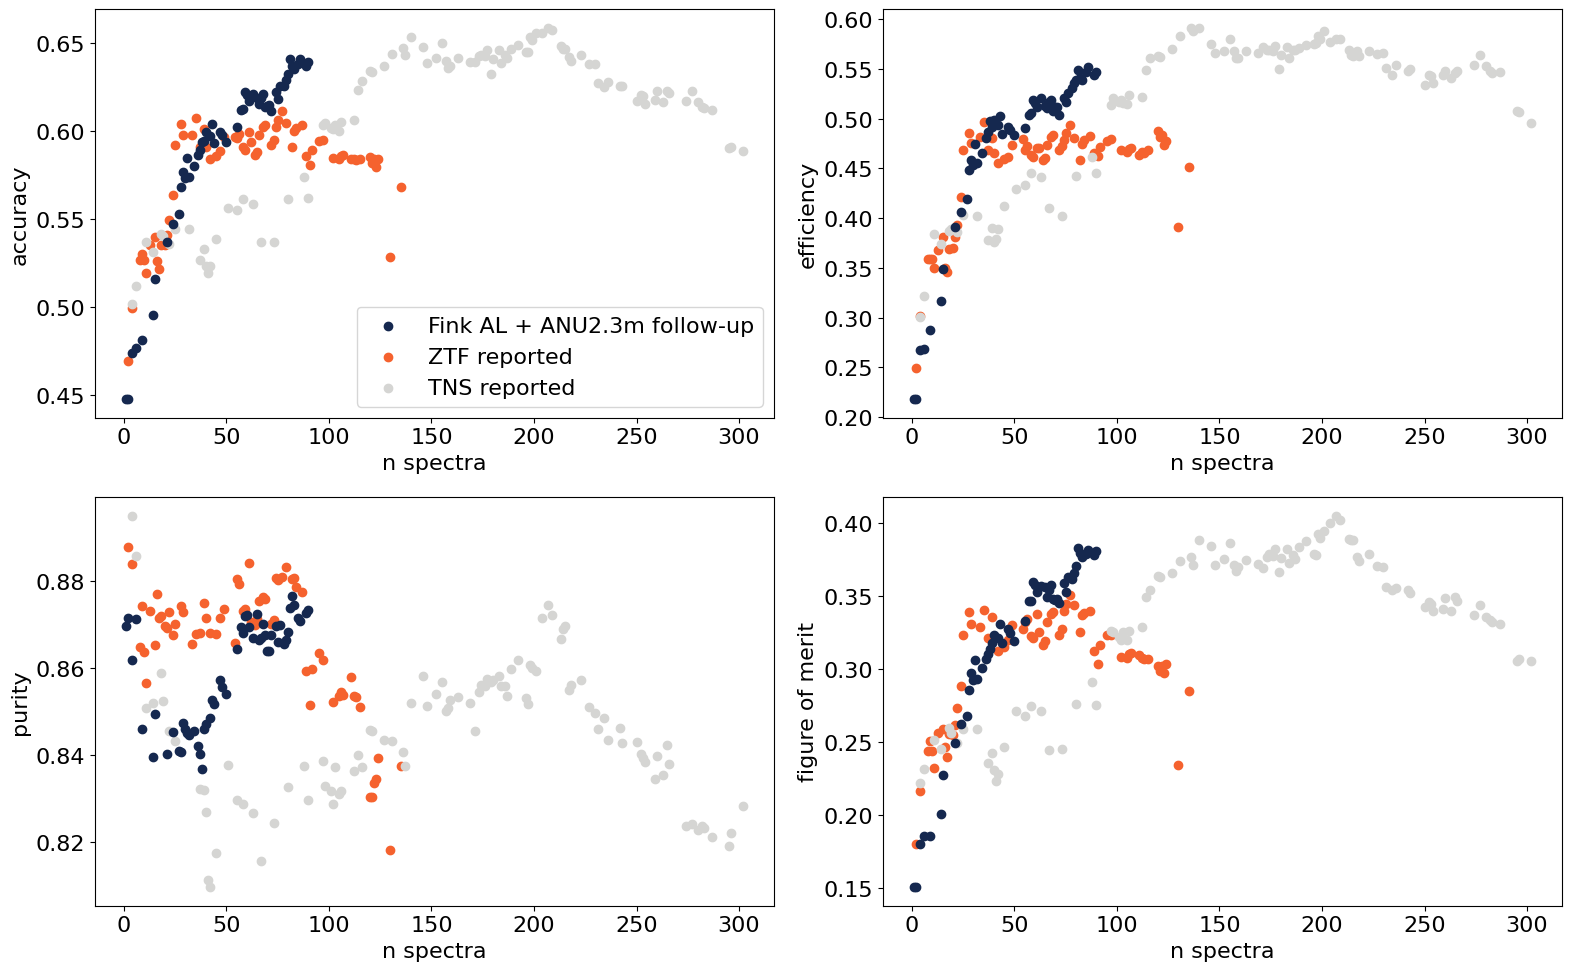

In [12]:
pu.plot_metrics_listdf([metrics_dic['FINK'],metrics_dic['ZTF'],metrics_dic['TNS']],['Fink AL + ANU2.3m follow-up','ZTF reported', 'TNS reported'],varx='n spectra', plots_dir = '../plots/', suffix='_FINK_ZTF_TNS')
